In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist #to import our dataset
from tensorflow.keras.models import Sequential, Model # imports our type of network
from tensorflow.keras.layers import Dense, Flatten, Input # imports our layers we want to use

from tensorflow.python.keras.losses import categorical_crossentropy #loss function
from tensorflow.python.keras.optimizers import Adam, SGD #optimisers
#from tensorflow.python.keras.utils import to_categorical #some function for data preparation


ImportError: cannot import name 'to_categorical' from 'tensorflow.python.keras.utils' (C:\Users\Richard\anaconda3\envs\ml\lib\site-packages\tensorflow_core\python\keras\utils\__init__.py)

In [6]:
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = to_categorical(y_train, num_classes)
#y_test = to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [8]:
print(y_train)

[5 0 4 ... 5 6 8]


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


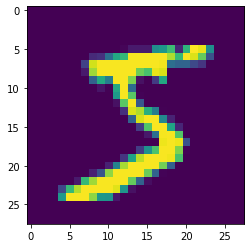

In [6]:
print(y_train[0])

plt.imshow(x_train[0])

In [12]:
#Neural network with single dense hidden layer

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(), metrics=['accuracy'])

#model.compile(loss=categorical_crossentropy,optimizer=Adadelta())


In [13]:
history1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/sample - loss: 1.1748 - acc: 0.7195 - val_loss: 0.6477 - val_acc: 0.8491
Epoch 2/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.5556 - acc: 0.8614 - val_loss: 0.4597 - val_acc: 0.8831
Epoch 3/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4422 - acc: 0.8822 - val_loss: 0.3933 - val_acc: 0.8972
Epoch 4/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3918 - acc: 0.8928 - val_loss: 0.3575 - val_acc: 0.9048
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3616 - acc: 0.8998 - val_loss: 0.3342 - val_acc: 0.9092
Epoch 6/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3404 - acc: 0.9050 - val_loss: 0.3174 - val_acc: 0.9124
Epoch 7/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3241 - acc: 0.9093 - val_loss: 0.

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  100480    
_________________________________________________________________
dense_7 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


10000/10000 [==============================] - 1s 53us/sample - loss: 0.2216 - acc: 0.9380

Test loss: 0.22163338498175145
Test accuracy: 0.938


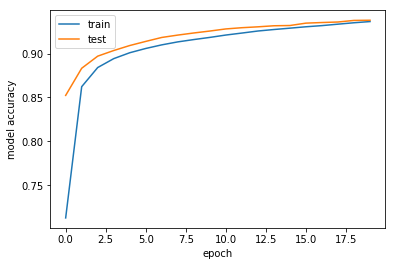

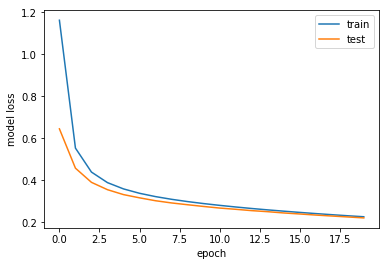

In [8]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [9]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=categorical_crossentropy,optimizer=SGD(), metrics=['accuracy'])

model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])

history2=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3675 - acc: 0.9000 - val_loss: 0.2096 - val_acc: 0.9406
Epoch 2/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1728 - acc: 0.9508 - val_loss: 0.1396 - val_acc: 0.9591
Epoch 3/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1233 - acc: 0.9649 - val_loss: 0.1177 - val_acc: 0.9655
Epoch 4/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0955 - acc: 0.9724 - val_loss: 0.0952 - val_acc: 0.9723
Epoch 5/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0763 - acc: 0.9781 - val_loss: 0.0907 - val_acc: 0.9735
Epoch 6/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0623 - acc: 0.9822 - val_loss: 0.0856 - val_acc: 0.9748
Epoch 7/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0517 - acc: 0.9852 - val_loss: 0.

In [10]:
# our old example: linear regression
model = Sequential()
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=categorical_crossentropy,optimizer=SGD(), metrics=['accuracy'])

model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])

history3=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.6642 - acc: 0.8352 - val_loss: 0.3818 - val_acc: 0.9027
Epoch 2/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3601 - acc: 0.9028 - val_loss: 0.3192 - val_acc: 0.9134
Epoch 3/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3187 - acc: 0.9120 - val_loss: 0.2973 - val_acc: 0.9183s: 0.3
Epoch 4/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2994 - acc: 0.9170 - val_loss: 0.2845 - val_acc: 0.9221
Epoch 5/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2875 - acc: 0.9202 - val_loss: 0.2770 - val_acc: 0.9220
Epoch 6/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2797 - acc: 0.9222 - val_loss: 0.2748 - val_acc: 0.9226
Epoch 7/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2737 - acc: 0.9232 - val_lo

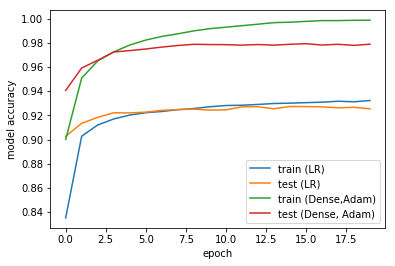

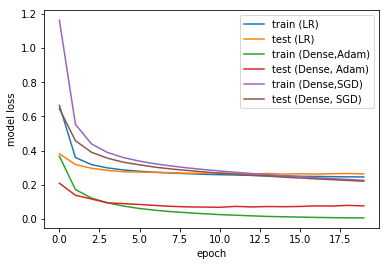

In [11]:
# evaluate model
#score = model.evaluate(x_test, y_test, verbose=1)

# print performance
#print()
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
#plt.plot(history1.history['acc'])
#plt.plot(history1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train (LR)', 'test (LR)','train (Dense,Adam)', 'test (Dense, Adam)','train (Dense,SGD)', 'test (Dense, SGD)'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train (LR)', 'test (LR)','train (Dense,Adam)', 'test (Dense, Adam)','train (Dense,SGD)', 'test (Dense, SGD)'], loc='best')
plt.show()

In [12]:
model = Sequential()
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=categorical_crossentropy,optimizer=SGD(), metrics=['accuracy'])

model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])

history4=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2597 - acc: 0.9250 - val_loss: 0.1130 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0972 - acc: 0.9706 - val_loss: 0.0960 - val_acc: 0.9715
Epoch 3/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0631 - acc: 0.9808 - val_loss: 0.0781 - val_acc: 0.9774
Epoch 4/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0457 - acc: 0.9861 - val_loss: 0.0767 - val_acc: 0.9743
Epoch 5/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0351 - acc: 0.9882 - val_loss: 0.0806 - val_acc: 0.9747
Epoch 6/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0248 - acc: 0.9923 - val_loss: 0.0877 - val_acc: 0.9752
Epoch 7/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0195 - acc: 0.9938 - val_loss: 0.

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  157000    
_________________________________________________________________
dense_6 (Dense)              multiple                  40200     
_________________________________________________________________
dense_7 (Dense)              multiple                  2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Alternative to Sequential model:

input_network = Input(shape=(28,28))
x = Flatten()(input_network)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
y = Dense(num_classes, activation='softmax')(x)

model= Model(input_network,outputs=y)
opt = Adam(lr=0.0001)
model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_11 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
history5=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2822 - acc: 0.9189 - val_loss: 0.1362 - val_acc: 0.9588
Epoch 2/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1045 - acc: 0.9688 - val_loss: 0.0910 - val_acc: 0.9706
Epoch 3/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0701 - acc: 0.9782 - val_loss: 0.0833 - val_acc: 0.9744
Epoch 4/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0496 - acc: 0.9846 - val_loss: 0.0784 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0388 - acc: 0.9876 - val_loss: 0.0714 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0297 - acc: 0.9905 - val_loss: 0.0859 - val_acc: 0.9725
Epoch 7/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0261 - acc: 0.9916 - val_loss: 0.